***Employee Salary Prediction***

In [1]:
!pip install xgboost

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [3]:
from google.colab import files
uploaded = files.upload()

Saving adult 3.csv to adult 3.csv


In [4]:
df = pd.read_csv(next(iter(uploaded)))

In [6]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df.head(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [8]:
display(df.tail())

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [9]:
df.shape

(48842, 15)

In [10]:
# Clean Data
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)
df = df[df['workclass'] != 'Without-pay']
df = df[df['workclass'] != 'Never-worked']
df.drop(columns=['education'], inplace=True)

In [17]:
# Convert target label to numeric
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [19]:
# Feature & Target
X = df.drop(columns='income')
y = df['income']

In [20]:
# Define categorical and numerical columns
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [21]:
# Preprocessor
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

In [24]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Models to Evaluate
models = {
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss'),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC()
}

In [35]:
# Create a dictionary to store accuracy scores
model_scores = {}

# Evaluate each model
for name, model in models.items():
    print(f"\n====================== {name} ======================")
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    model_scores[name] = acc

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", acc)

# Show all model scores after evaluation
print("\n======= Model Accuracy Scores =======")
for model, score in model_scores.items():
    print(f"{model}: {score:.4f}")



====================== XGBoost ======================


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:21:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6856
           1       0.77      0.66      0.71      2185

    accuracy                           0.87      9041
   macro avg       0.83      0.80      0.81      9041
weighted avg       0.86      0.87      0.87      9041

Accuracy: 0.8692622497511338

====================== Random Forest ======================
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6856
           1       0.74      0.63      0.68      2185

    accuracy                           0.86      9041
   macro avg       0.81      0.78      0.79      9041
weighted avg       0.85      0.86      0.85      9041

Accuracy: 0.8562105961729897

====================== Logistic Regression ======================
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93   

/tmp/ipython-input-36-540419614.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()), palette="viridis")


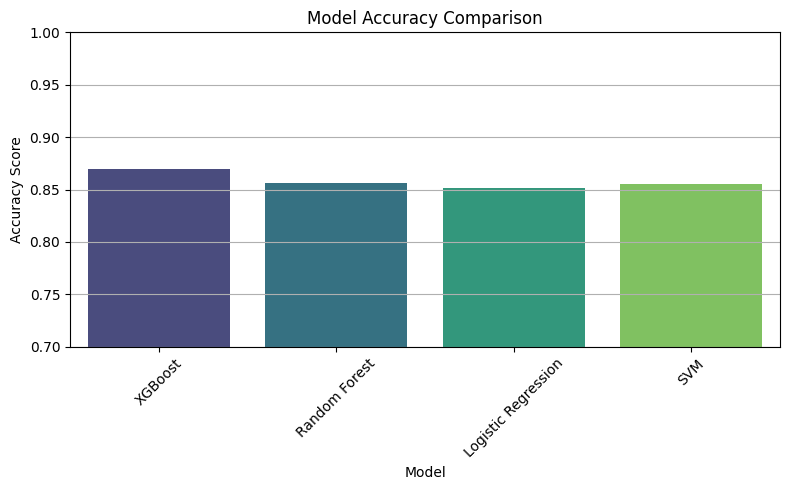

In [36]:
# Plotting: Model Accuracy Comparison Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()), palette="viridis")
plt.ylabel("Accuracy Score")
plt.xlabel("Model")
plt.ylim(0.7, 1.0)  # Adjust based on your actual accuracy range
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

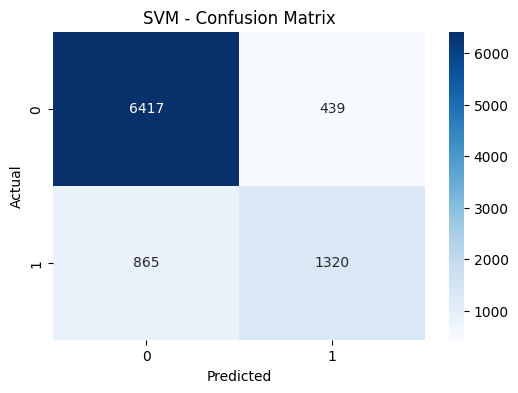

In [37]:
 # Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title(f"{name} - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
# Find the best model
best_model = max(model_scores, key=model_scores.get)
print(f"\n✅ Best Model: {best_model} with Accuracy: {model_scores[best_model]:.4f}")


✅ Best Model: XGBoost with Accuracy: 0.8693


In [47]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Set page config
st.set_page_config(page_title="Employee Salary Prediction", layout="wide")

st.title("💼 Employee Salary Prediction App")

# File uploader
uploaded_file = st.file_uploader("Upload CSV file (like adult.csv):", type=["csv"])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
else:
    st.info("No file uploaded. Using example dataset.")
    df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/adult-all.csv", header=None)
    df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                  'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                  'hours-per-week', 'native-country', 'income']

# Data cleaning
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)
df = df[df['workclass'] != 'Without-pay']
df = df[df['workclass'] != 'Never-worked']
if 'education' in df.columns:
    df.drop(columns=['education'], inplace=True)

# Convert income to 0 and 1
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Features and target
X = df.drop(columns='income')
y = df['income']

cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

# Model pipeline
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(n_estimators=100, eval_metric="logloss"))
])

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

acc = accuracy_score(y_test, y_pred)
st.success(f"✅ Model trained! Accuracy: {acc:.2f}")

# Prediction on uploaded data
st.subheader("🔍 Salary Distribution by Age & Gender")

# Age bins
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 60, 100],
                         labels=['<25', '25-35', '35-45', '45-60', '60+'])

fig1, ax1 = plt.subplots(figsize=(8, 4))
sns.countplot(data=df, x='age_group', hue='income', palette="pastel", ax=ax1)
ax1.set_title("Salary Distribution by Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")
st.pyplot(fig1)

fig2, ax2 = plt.subplots(figsize=(6, 4))
sns.countplot(data=df, x='sex', hue='income', palette="muted", ax=ax2)
ax2.set_title("Salary Distribution by Gender")
ax2.set_xlabel("Gender")
ax2.set_ylabel("Count")
st.pyplot(fig2)

# Optional: upload new user data for prediction
st.subheader("📂 Upload New Data for Salary Prediction")
new_file = st.file_uploader("Upload new employee data CSV (same columns as training data):", key="predict")

if new_file:
    new_data = pd.read_csv(new_file)
    if 'income' in new_data.columns:
        new_data.drop(columns='income', inplace=True)
    predictions = pipe.predict(new_data)
    new_data['Predicted Income'] = np.where(predictions == 1, '>50K', '<=50K')
    st.write(new_data.head())
    csv = new_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, "predictions.csv", "text/csv")


Overwriting app.py


In [40]:
from google.colab import files
files.download('app.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
# Install dependencies
!pip install streamlit pyngrok --quiet

In [42]:
%%writefile app.py
import streamlit as st
st.title("🧠 Salary Prediction Demo")
st.write("Upload CSV and visualize income prediction by age and gender here.")

Overwriting app.py


In [49]:
from pyngrok import ngrok

# Add your authtoken here (replace with your token)
authtoken = "30Do0FI5neayC8cJd4hbG7SeTir_7XgYWcG8Q1E6HF3WmowJR"
ngrok.set_auth_token(authtoken)

In [50]:
from pyngrok import ngrok
import os

# (Only needed once per session)
ngrok.set_auth_token("30Do0FI5neayC8cJd4hbG7SeTir_7XgYWcG8Q1E6HF3WmowJR")  # Replace with your token

# Kill previous tunnels if re-running
ngrok.kill()

# Start Streamlit app in background
!streamlit run app.py &>/content/logs.txt &

# Create ngrok tunnel (correct format)
public_url = ngrok.connect(addr="8501", proto="http")
print("✅ Streamlit app is running at:", public_url)



✅ Streamlit app is running at: NgrokTunnel: "https://22b3334ed41f.ngrok-free.app" -> "http://localhost:8501"
